In [1]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.model_selection import cross_val_score

import joblib
import pandas as pd
import numpy as np
import re
import os
import pickle
import json
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_train = pd.read_csv("../../traindata_2020_afterCovid.csv")
df_test = pd.read_csv("../../testdata_2021_afterCovid.csv")

In [3]:
# train set
reviews_train = list(df_train["clean_review"])
sentiments_train = list(df_train["sentiment"])
# test set
reviews_test = list(df_test["clean_review"])
sentiments_test = list(df_test["sentiment"])

In [4]:
vectorizer = CountVectorizer(analyzer="word", max_features=5000)

X_train = vectorizer.fit_transform(reviews_train)
y_train = np.array(sentiments_train)

X_test = vectorizer.transform(reviews_test)
y_test = np.array(sentiments_test)

In [5]:
nb = BernoulliNB()
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_test)

In [6]:
print("Accuracy: %f" % accuracy_score(y_test, nb_pred))

Accuracy: 0.823369


Text(0.5, 257.44, 'Predicted label')

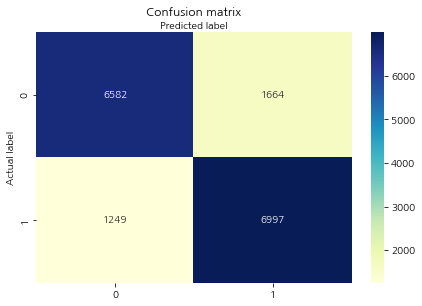

In [7]:
cnf_matrix = metrics.confusion_matrix(y_test, nb_pred)

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [8]:
print("Accuracy:",metrics.accuracy_score(y_test, nb_pred))
print("Precision:",metrics.precision_score(y_test, nb_pred))
print("Recall:",metrics.recall_score(y_test, nb_pred))
print("F1-score:",metrics.f1_score(y_test, nb_pred))

Accuracy: 0.8233689061363085
Precision: 0.8078743794019166
Recall: 0.8485326218772739
F1-score: 0.8277045010942213


In [9]:
from sklearn.metrics import classification_report

print(classification_report(y_test, nb_pred, target_names=['class low', 'class high']))

              precision    recall  f1-score   support

   class low       0.84      0.80      0.82      8246
  class high       0.81      0.85      0.83      8246

    accuracy                           0.82     16492
   macro avg       0.82      0.82      0.82     16492
weighted avg       0.82      0.82      0.82     16492



In [10]:
y_test = np.array(sentiments_test)
print(y_test.sum())
print(len(y_test))


8246
16492


In [11]:
report = classification_report(y_test, nb_pred, target_names=['class low', 'class high'], output_dict=True)

In [12]:
report = classification_report(y_test, nb_pred, target_names=['class low', 'class high'], output_dict=True)
df = pd.DataFrame(report).transpose()

df

,precision,recall,f1-score,support
class low,0.840506,0.798205,0.818809,8246.000000
class high,0.807874,0.848533,0.827705,8246.000000
accuracy,0.823369,0.823369,0.823369,0.823369
macro avg,0.824190,0.823369,0.823257,16492.000000
weighted avg,0.824190,0.823369,0.823257,16492.000000


In [13]:
# 모델 저장
joblib.dump(nb, './nb_bow_afterCovid_0.823369')

['./nb_bow_afterCovid_0.823369']